In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
#reading in the data
df = pd.read_csv('car_sales_data.csv')

In [7]:
#to view top 10 rows of the data
df.head(10)

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,01/08/2022,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,15/03/2023,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,29/04/2023,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,04/09/2022,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,16/06/2022,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85
5,18/12/2022,Terry Perkins MD,John Olsen,Ford,Altima,2015,14769,0.077247,1140.86
6,12/06/2022,Ashley Brown,Tyler Lawson,Honda,F-150,2013,41397,0.142780,5910.67
7,20/06/2022,Norma Watkins,Michael Bond,Ford,Altima,2015,46233,0.071624,3311.38
8,02/09/2022,Scott Parker,Stephanie Smith,Ford,Corolla,2021,27337,0.099504,2720.13
9,06/04/2023,Andrew Smith,Ashley Moreno DDS,Ford,Civic,2018,16309,0.149926,2445.14


In [8]:
#to channge the column names to lower case for easy typing column names
df.columns = [x.lower() for x in df.columns]

In [9]:
# Check the size of the dataset
print('Dataset size:', df.shape)

Dataset size: (1048575, 9)


In [10]:
#To check duplicates
df.duplicated().sum()

0

In [11]:
#to only display column with missing values
missing_df = df.isnull().sum(axis = 0)
missing_df = missing_df[missing_df != 0]
missing_df

Series([], dtype: int64)

In [14]:
#Explanatory data analysis
print(df.describe())

           car year    sale price  commission rate  commission earned
count  1.048575e+06  1.048575e+06     1.048575e+06       1.048575e+06
mean   2.015995e+03  3.001837e+04     9.995861e-02       3.000824e+03
std    3.740360e+00  1.154381e+04     2.886096e-02       1.480912e+03
min    2.010000e+03  1.000000e+04     5.000014e-02       5.013400e+02
25%    2.013000e+03  2.003000e+04     7.493990e-02       1.822280e+03
50%    2.016000e+03  3.000900e+04     9.996744e-02       2.741750e+03
75%    2.019000e+03  4.003200e+04     1.249475e-01       3.978925e+03
max    2.022000e+03  5.000000e+04     1.500000e-01       7.494530e+03


In [17]:
#Chech the unique car makes in the dataset
print(df['car make'].unique())

['Nissan' 'Ford' 'Honda' 'Toyota' 'Chevrolet']


In [18]:
print(df['car make'].value_counts())

Honda        210101
Ford         210074
Chevrolet    209971
Toyota       209315
Nissan       209114
Name: car make, dtype: int64


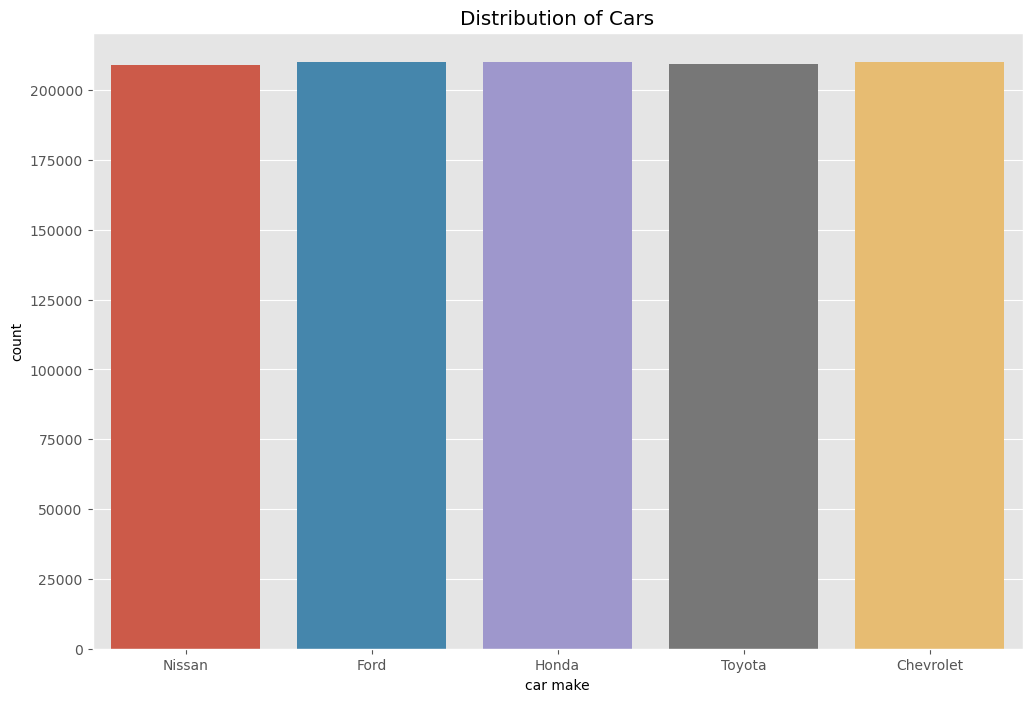

In [27]:
#Distribution of car makes
sns.countplot( x= df['car make'])
plt.title('Distribution of Cars');

In [28]:
#Chech the unique car models in the dataset
print(df['car model'].unique())

['Altima' 'F-150' 'Civic' 'Silverado' 'Corolla']


In [20]:
print(df['car model'].value_counts())

Silverado    210257
Civic        209918
F-150        209643
Corolla      209422
Altima       209335
Name: car model, dtype: int64


In [30]:
#Top sales persons
print(df['salesperson'].value_counts().head())

Michael Smith        540
Michael Johnson      410
James Smith          347
David Smith          340
Christopher Smith    325
Name: salesperson, dtype: int64


In [32]:
#car make with the most sales
print(df['car make'].value_counts().idxmax())

Honda


In [33]:
#car model with the most sales
print(df['car model'].value_counts().idxmax())

Silverado


In [34]:
#yearly sales
yearly_sales = df.groupby('car year')['sale price'].sum().reset_index()
yearly_sales = yearly_sales.sort_values(by='sale price', ascending=False)
print(yearly_sales)

    car year  sale price
7       2017  2439544778
3       2013  2434875649
0       2010  2431900289
5       2015  2428038847
2       2012  2424144771
9       2019  2422945771
6       2016  2422877745
10      2020  2420677424
8       2018  2419835114
12      2022  2411756970
1       2011  2409996542
4       2014  2408436490
11      2021  2401486049


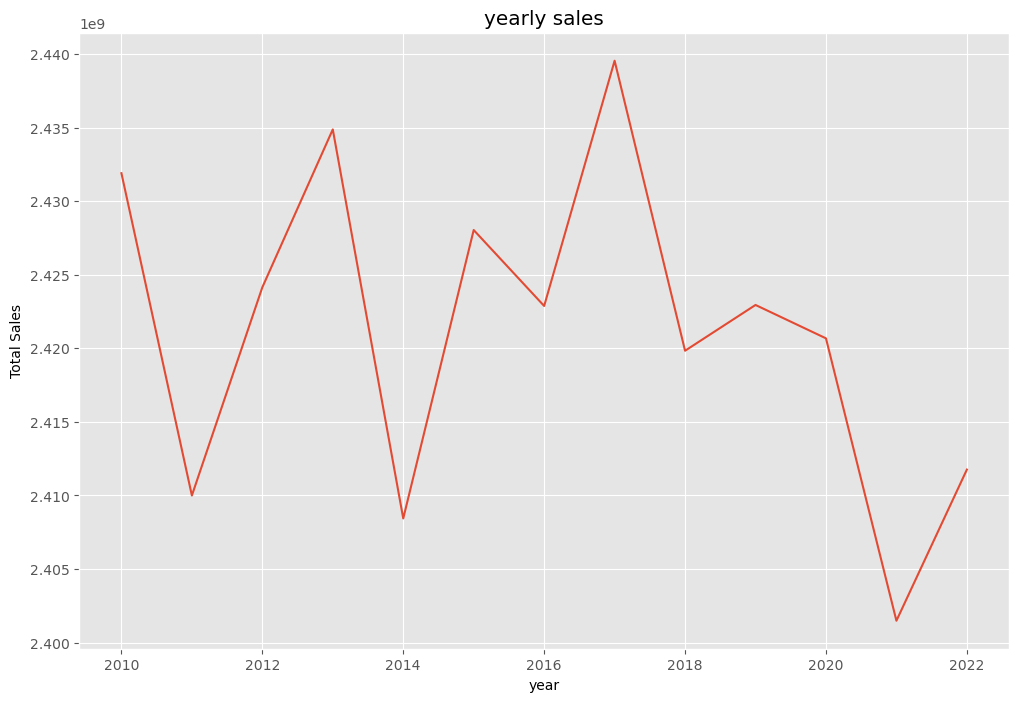

In [38]:
# Group the data by year and calculate the total sales for each year
yearly_sales = df.groupby('car year')['sale price'].sum()

# Create a line chart to visualize the yearly sales
plt.plot(yearly_sales)
plt.xlabel('year')
plt.ylabel('Total Sales')
plt.title('yearly sales')
plt.show()

C:\Users\Vincent\AppData\Local\Temp\ipykernel_3392\287549822.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='rocket')


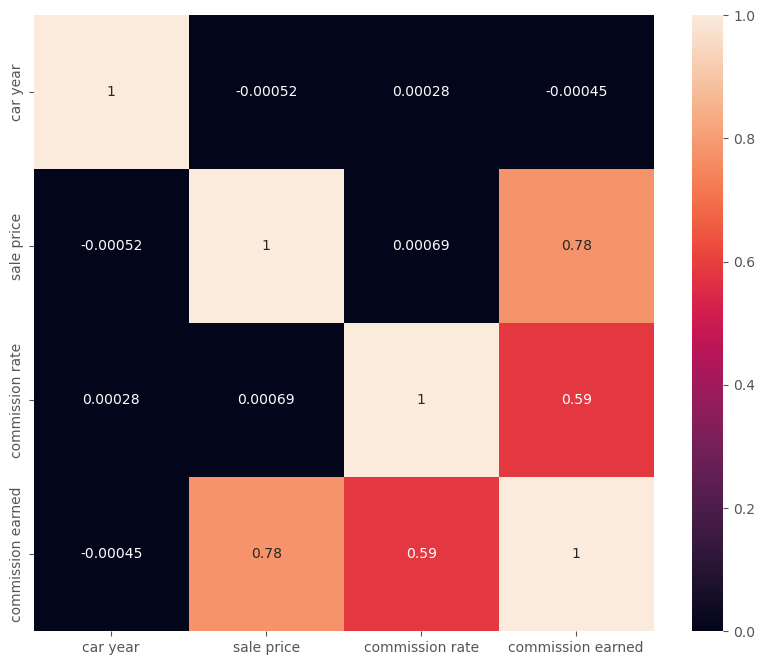

In [41]:
#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.show()